# Pytorch Learning Notebook  
# PCA, Classification
1 - Carbendazim  
2 - Thiacloprid  
4 - Acetamiprid   
Mixtures of the above mentioned analytes

Batch 3 of the colloids was chosen for all of the recordings due to the superior signal intensity that it showed.  

Mixtures 2 + 4 and 1 + 2 + 4 are different from all of the other data. Integration time was changed from 500ms to 1500ms due to insufficient strength of the signal

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from tools.ramanflow.read_data import ReadData as rd
from tools.ramanflow.prep_data import PrepData as rpd

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [4]:
from sklearn.decomposition import PCA

## Read the data

The naming convention here as follows: NameOfAnalyte_BatchNo_ColloidsReductionSpeed_TypeOfReading  
**NameOfAnalyte**: 1 = car, 2 = thia, 4 = aceta  
**BatchNo**: Here it gets a bit tricky. The batch of colloids is the same in all of the measurements. However we splitted the acquisition into 3 separate recodrings to have a bit of variation within the batch. So the colloids that were used are all from the same batch.  
**CollidsReductionSpeed**: 3min is the time of how long it took to reduce 90ml of HH+NaOH with 10ml of AgNO3. I call it reduction speed for convinience and because it represents the matter more accurately  
**TypeOfReading**: Generally speaking there are 2 types of reading. Single spectra acquisition or spectral mapping where multiple spectra acquired. 50X50 means the mapping has 50X50 spectral images each of which corresponds to single spectra. So there are 2500 spectra in one recording.   

Total amount of data for each of the analyte and the mixtures is 7500 spectra.

#### 1 - Carbendazim

In [5]:
f_sup, car_batch1_3min_mapping = rd.read_data("data/20220422 SERS data generation/analyte 1/mapping50X50/1_3min_b3_50X50_spectral_mapping_1.tif")
f_sup, car_batch2_3min_mapping = rd.read_data("data/20220422 SERS data generation/analyte 1/mapping50X50/1_3min_b3_50X50_spectral_mapping_2.tif")
f_sup, car_batch3_3min_mapping = rd.read_data("data/20220422 SERS data generation/analyte 1/mapping50X50/1_3min_b3_50X50_spectral_mapping_3.tif")

<tifffile.TiffFile '1_3min_b3_50X50_…l_mapping_1.tif'> ImageJ series contains unidentified dimension
<tifffile.TiffFile '1_3min_b3_50X50_…l_mapping_2.tif'> ImageJ series contains unidentified dimension
<tifffile.TiffFile '1_3min_b3_50X50_…l_mapping_3.tif'> ImageJ series contains unidentified dimension


#### 2 - Thiacloprid

In [6]:
f_sup, thia_batch1_3min_mapping = rd.read_data("data/20220421 SERS data generation/analyte 2/mapping 50X50/2_3min_b3_50X50_spectral_mapping_1.tif")
f_sup, thia_batch2_3min_mapping = rd.read_data("data/20220421 SERS data generation/analyte 2/mapping 50X50/2_3min_b3_50X50_spectral_mapping_2.tif")
f_sup, thia_batch3_3min_mapping = rd.read_data("data/20220421 SERS data generation/analyte 2/mapping 50X50/2_3min_b3_50X50_spectral_mapping_3.tif")

<tifffile.TiffFile '2_3min_b3_50X50_…l_mapping_1.tif'> ImageJ series contains unidentified dimension
<tifffile.TiffFile '2_3min_b3_50X50_…l_mapping_2.tif'> ImageJ series contains unidentified dimension
<tifffile.TiffFile '2_3min_b3_50X50_…l_mapping_3.tif'> ImageJ series contains unidentified dimension


#### 4 - Acetamiprid

In [7]:
f_sup, aceta_batch1_3min_mapping = rd.read_data("data/20220421 SERS data generation/analyte 4/mapping50X50/4_3min_b3_50X50_spectral_mapping_1.tif")
f_sup, aceta_batch2_3min_mapping = rd.read_data("data/20220421 SERS data generation/analyte 4/mapping50X50/4_3min_b3_50X50_spectral_mapping_2.tif")
f_sup, aceta_batch3_3min_mapping = rd.read_data("data/20220421 SERS data generation/analyte 4/mapping50X50/4_3min_b3_50X50_spectral_mapping_3.tif")

<tifffile.TiffFile '4_3min_b3_50X50_…l_mapping_1.tif'> ImageJ series contains unidentified dimension
<tifffile.TiffFile '4_3min_b3_50X50_…l_mapping_2.tif'> ImageJ series contains unidentified dimension
<tifffile.TiffFile '4_3min_b3_50X50_…l_mapping_3.tif'> ImageJ series contains unidentified dimension


### Mixtures

#### 1 + 2

In [8]:
f_sup, car_thia_batch1_3min_mapping = rd.read_data("data/20220422 SERS data generation/analyte 1+2/mapping50X50/1+2_3min_b3_50X50_spectral_mapping_1.tif")
f_sup, car_thia_batch2_3min_mapping = rd.read_data("data/20220422 SERS data generation/analyte 1+2/mapping50X50/1+2_3min_b3_50X50_spectral_mapping_2.tif")
f_sup, car_thia_batch3_3min_mapping = rd.read_data("data/20220422 SERS data generation/analyte 1+2/mapping50X50/1+2_3min_b3_50X50_spectral_mapping_3.tif")

<tifffile.TiffFile '1+2_3min_b3_50X5…l_mapping_1.tif'> ImageJ series contains unidentified dimension
<tifffile.TiffFile '1+2_3min_b3_50X5…l_mapping_2.tif'> ImageJ series contains unidentified dimension
<tifffile.TiffFile '1+2_3min_b3_50X5…l_mapping_3.tif'> ImageJ series contains unidentified dimension


#### 1 + 4  

**This set of measurements had some problems**  

The premixed solution of 1 and 4 that was made on 04/20 and measured on 04/21 showed strong signal.  
**However** the premixed solution of 1 and 4 that was made on 04/21 and measured on 04/22 showed no signal at all.  
In order to have a data to train on we made a decision to procede with 04/20 solution even though at the time of the experiment it was already 2 days old.  
This poses another challenge of the data reproducibility and uniformity. We normally would prefer the experimental condition to stay the same across all measurements. 

In [9]:
f_sup, car_aceta_batch1_3min_mapping = rd.read_data("data/20220422 SERS data generation/analyte 1+4/mapping50X50/1+4(2days)_3min_b3_50X50_spectral_mapping_1.tif")
f_sup, car_aceta_batch2_3min_mapping = rd.read_data("data/20220422 SERS data generation/analyte 1+4/mapping50X50/1+4(2days)_3min_b3_50X50_spectral_mapping_2.tif")
f_sup, car_aceta_batch3_3min_mapping = rd.read_data("data/20220422 SERS data generation/analyte 1+4/mapping50X50/1+4(2days)_3min_b3_50X50_spectral_mapping_3.tif")

<tifffile.TiffFile '1+4(2days)_3min…al_mapping_1.tif'> ImageJ series contains unidentified dimension
<tifffile.TiffFile '1+4(2days)_3min…al_mapping_2.tif'> ImageJ series contains unidentified dimension
<tifffile.TiffFile '1+4(2days)_3min…al_mapping_3.tif'> ImageJ series contains unidentified dimension


#### 2 + 4  

As was mentioned before, this particular mixture was having a hard time producing good signal at 500ms integration time. So 1500ms was chosen instead. However the mapping size was reduced to save the time during the acquisition.  

**However, recording 6 and 7 had some issues**  

In [10]:
f_sup, thia_aceta_batch1_3min_mapping = rd.read_data("data/20220421 SERS data generation/analyte 2+4/mapping 32X32/2+4_3min_b3_32X32__1500ms_spectral_mapping_1.tif")
f_sup, thia_aceta_batch2_3min_mapping = rd.read_data("data/20220421 SERS data generation/analyte 2+4/mapping 32X32/2+4_3min_b3_32X32__1500ms_spectral_mapping_2.tif")
f_sup, thia_aceta_batch3_3min_mapping = rd.read_data("data/20220421 SERS data generation/analyte 2+4/mapping 32X32/2+4_3min_b3_32X32__1500ms_spectral_mapping_3.tif")
f_sup, thia_aceta_batch4_3min_mapping = rd.read_data("data/20220421 SERS data generation/analyte 2+4/mapping 32X32/2+4_3min_b3_32X32__1500ms_spectral_mapping_4.tif")
f_sup, thia_aceta_batch5_3min_mapping = rd.read_data("data/20220421 SERS data generation/analyte 2+4/mapping 32X32/2+4_3min_b3_32X32__1500ms_spectral_mapping_5.tif")
f_sup, thia_aceta_batch6_3min_mapping = rd.read_data("data/20220421 SERS data generation/analyte 2+4/mapping 32X32/2+4_3min_b3_32X32_1500ms_spectral_mapping_6(problem).tif")
f_sup, thia_aceta_batch7_3min_mapping = rd.read_data("data/20220421 SERS data generation/analyte 2+4/mapping 32X32/2+4_3min_b3_32X32__1500ms_spectral_mapping_7(problem).tif")

<tifffile.TiffFile '2+4_3min_b3_32X3…l_mapping_1.tif'> ImageJ series contains unidentified dimension
<tifffile.TiffFile '2+4_3min_b3_32X3…l_mapping_2.tif'> ImageJ series contains unidentified dimension
<tifffile.TiffFile '2+4_3min_b3_32X3…l_mapping_3.tif'> ImageJ series contains unidentified dimension
<tifffile.TiffFile '2+4_3min_b3_32X3…l_mapping_4.tif'> ImageJ series contains unidentified dimension
<tifffile.TiffFile '2+4_3min_b3_32X3…l_mapping_5.tif'> ImageJ series contains unidentified dimension
<tifffile.TiffFile '2+4_3min_b3_32X3…_6(problem).tif'> ImageJ series contains unidentified dimension
<tifffile.TiffFile '2+4_3min_b3_32X…g_7(problem).tif'> ImageJ series contains unidentified dimension


#### 1 + 2 + 4

In [11]:
f_sup, car_thia_aceta_batch1_3min_mapping = rd.read_data("data/20220422 SERS data generation/analyte 1+2+4/mapping32X32/1+2+4_3min_b3_32X32_spectral_mapping_1500ms_1.tif")
f_sup, car_thia_aceta_batch2_3min_mapping = rd.read_data("data/20220422 SERS data generation/analyte 1+2+4/mapping32X32/1+2+4_3min_b3_32X32_spectral_mapping_1500ms_2.tif")
f_sup, car_thia_aceta_batch3_3min_mapping = rd.read_data("data/20220422 SERS data generation/analyte 1+2+4/mapping32X32/1+2+4_3min_b3_32X32_spectral_mapping_1500ms_3.tif")

<tifffile.TiffFile '1+2+4_3min_b3_3…ing_1500ms_1.tif'> ImageJ series contains unidentified dimension
<tifffile.TiffFile '1+2+4_3min_b3_3…ing_1500ms_2.tif'> ImageJ series contains unidentified dimension
<tifffile.TiffFile '1+2+4_3min_b3_3…ing_1500ms_3.tif'> ImageJ series contains unidentified dimension


## Data preprocessing

#### Collecting all three batches from each of the analyte into one matrix  

**At the same time we remove cosmic rays that may appear in individual spectra**

In [12]:
whos

Variable                             Type       Data/Info
---------------------------------------------------------
PCA                                  ABCMeta    <class 'sklearn.decomposition._pca.PCA'>
aceta_batch1_3min_mapping            ndarray    2500x1600: 4000000 elems, type `float64`, 32000000 bytes (30.517578125 Mb)
aceta_batch2_3min_mapping            ndarray    2500x1600: 4000000 elems, type `float64`, 32000000 bytes (30.517578125 Mb)
aceta_batch3_3min_mapping            ndarray    2500x1600: 4000000 elems, type `float64`, 32000000 bytes (30.517578125 Mb)
car_aceta_batch1_3min_mapping        ndarray    2500x1600: 4000000 elems, type `float64`, 32000000 bytes (30.517578125 Mb)
car_aceta_batch2_3min_mapping        ndarray    2500x1600: 4000000 elems, type `float64`, 32000000 bytes (30.517578125 Mb)
car_aceta_batch3_3min_mapping        ndarray    2500x1600: 4000000 elems, type `float64`, 32000000 bytes (30.517578125 Mb)
car_batch1_3min_mapping              ndarray    2500x1600

### 1

In [15]:
car_collected_preprocessed = np.zeros((7500, 1600))
car_collected_preprocessed[0:2500] = rpd.remove_cosmic_rays(car_batch1_3min_mapping, 10)
car_collected_preprocessed[2500:5000] = rpd.remove_cosmic_rays(car_batch2_3min_mapping, 10)
car_collected_preprocessed[5000:] = rpd.remove_cosmic_rays(car_batch3_3min_mapping, 10)

In [35]:
car_collected_preprocessed = np.zeros((7500, 1430))
car_collected_preprocessed[0:2500] = car_batch1_3min_mapping[:, 170:]
car_collected_preprocessed[2500:5000] = car_batch2_3min_mapping[:, 170:]
car_collected_preprocessed[5000:] = car_batch3_3min_mapping[:, 170:]

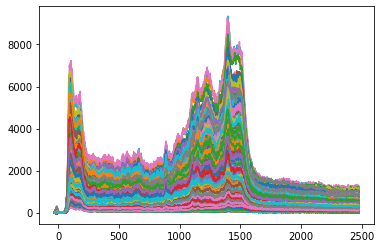

In [32]:
for i in range(len(car_collected_preprocessed)):
    plt.plot(f_sup, car_collected_preprocessed[i])
plt.show()

### 2

In [14]:
thia_collected_preprocessed = np.zeros((7500, 1600))
thia_collected_preprocessed[0:2500] = rpd.remove_cosmic_rays(thia_batch1_3min_mapping, 7)
thia_collected_preprocessed[2500:5000] = rpd.remove_cosmic_rays(thia_batch2_3min_mapping, 7)
thia_collected_preprocessed[5000:] = rpd.remove_cosmic_rays(thia_batch3_3min_mapping, 7)

/home/anvar/python_envs/jupyter/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/anvar/python_envs/jupyter/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [40]:
thia_collected_preprocessed = rpd.remove_cosmic_rays(thia_collected_preprocessed, 10)

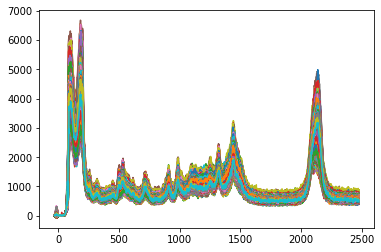

In [41]:
for i in range(len(car_collected_preprocessed)):
    plt.plot(f_sup, thia_collected_preprocessed[i])
plt.show()

### 4

In [17]:
aceta_collected_preprocessed = np.zeros((7500, 1600))
aceta_collected_preprocessed[0:2500] = rpd.remove_cosmic_rays(aceta_batch1_3min_mapping, 7)
aceta_collected_preprocessed[2500:5000] = rpd.remove_cosmic_rays(aceta_batch2_3min_mapping, 7)
aceta_collected_preprocessed[5000:] = rpd.remove_cosmic_rays(aceta_batch3_3min_mapping, 7)

In [52]:
aceta_collected_preprocessed = rpd.remove_cosmic_rays(aceta_collected_preprocessed, 7)

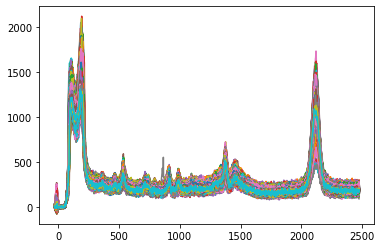

In [53]:
for i in range(len(car_collected_preprocessed)):
    plt.plot(f_sup, aceta_collected_preprocessed[i])
plt.show()

### 1 + 2

In [18]:
car_thia_collected_preprocessed = np.zeros((7500, 1600))
car_thia_collected_preprocessed[0:2500] = rpd.remove_cosmic_rays(car_thia_batch1_3min_mapping, 7)
car_thia_collected_preprocessed[2500:5000] = rpd.remove_cosmic_rays(car_thia_batch2_3min_mapping, 7)
car_thia_collected_preprocessed[5000:] = rpd.remove_cosmic_rays(car_thia_batch3_3min_mapping, 7)

/home/anvar/python_envs/jupyter/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/anvar/python_envs/jupyter/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [54]:
car_thia_collected_preprocessed = rpd.remove_cosmic_rays(car_thia_collected_preprocessed, 10)

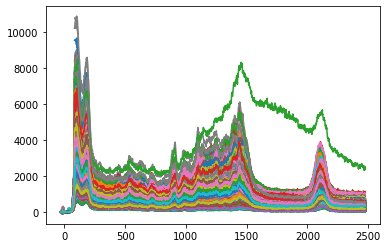

In [55]:
for i in range(len(car_collected_preprocessed)):
    plt.plot(f_sup, car_thia_collected_preprocessed[i])
plt.show()

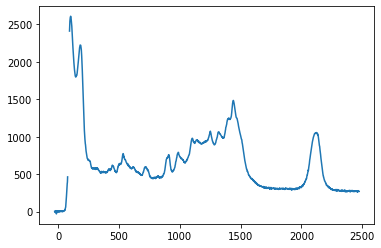

In [106]:
plt.plot(f_sup, np.mean(car_thia_collected_preprocessed, axis=0))

### 1 + 4

In [19]:
car_aceta_collected_preprocessed = np.zeros((7500, 1600))
car_aceta_collected_preprocessed[0:2500] = rpd.remove_cosmic_rays(car_aceta_batch1_3min_mapping, 7)
car_aceta_collected_preprocessed[2500:5000] = rpd.remove_cosmic_rays(car_aceta_batch2_3min_mapping, 7)
car_aceta_collected_preprocessed[5000:] = rpd.remove_cosmic_rays(car_aceta_batch3_3min_mapping, 7)

In [56]:
car_aceta_collected_preprocessed = rpd.remove_cosmic_rays(car_aceta_collected_preprocessed, 10)

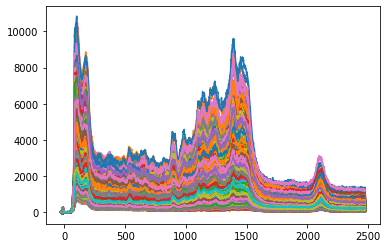

In [57]:
for i in range(len(car_collected_preprocessed)):
    plt.plot(f_sup, car_aceta_collected_preprocessed[i])
plt.show()

### 2 + 4

In [20]:
thia_aceta_collected_preprocessed = np.zeros((7168, 1600))
thia_aceta_collected_preprocessed[0:1024] = rpd.remove_cosmic_rays(thia_aceta_batch1_3min_mapping, 7)
thia_aceta_collected_preprocessed[1024:2048] = rpd.remove_cosmic_rays(thia_aceta_batch2_3min_mapping, 7)
thia_aceta_collected_preprocessed[2048:3072] = rpd.remove_cosmic_rays(thia_aceta_batch3_3min_mapping, 7)
thia_aceta_collected_preprocessed[3072:4096] = rpd.remove_cosmic_rays(thia_aceta_batch4_3min_mapping, 7)
thia_aceta_collected_preprocessed[4096:5120] = rpd.remove_cosmic_rays(thia_aceta_batch5_3min_mapping, 7)
thia_aceta_collected_preprocessed[5120:6144] = rpd.remove_cosmic_rays(thia_aceta_batch6_3min_mapping, 7)
thia_aceta_collected_preprocessed[6144:] = rpd.remove_cosmic_rays(thia_aceta_batch7_3min_mapping, 7)

In [58]:
thia_aceta_collected_preprocessed = rpd.remove_cosmic_rays(thia_aceta_collected_preprocessed, 10)

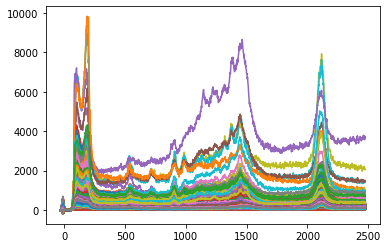

In [59]:
for i in range(len(thia_aceta_collected_preprocessed)):
    plt.plot(f_sup, thia_aceta_collected_preprocessed[i])
plt.show()

### 1 + 2 + 4

In [21]:
car_thia_aceta_collected_preprocessed = np.zeros((3072, 1600))
car_thia_aceta_collected_preprocessed[0:1024] = rpd.remove_cosmic_rays(car_thia_aceta_batch1_3min_mapping, 7)
car_thia_aceta_collected_preprocessed[1024:2048] = rpd.remove_cosmic_rays(car_thia_aceta_batch2_3min_mapping, 7)
car_thia_aceta_collected_preprocessed[2048:] = rpd.remove_cosmic_rays(car_thia_aceta_batch3_3min_mapping, 7)

In [60]:
car_thia_aceta_collected_preprocessed = rpd.remove_cosmic_rays(car_thia_aceta_collected_preprocessed, 10)

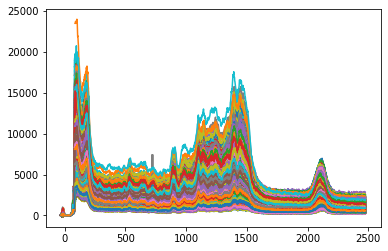

In [61]:
for i in range(len(car_thia_aceta_collected_preprocessed)):
    plt.plot(f_sup, car_thia_aceta_collected_preprocessed[i])
plt.show()

### Put all of the data in one big matrix

In [66]:
spectra_dataset = np.zeros((47740, 1600))
spectra_dataset[0:7500] = car_collected_preprocessed
spectra_dataset[7500:15000] = thia_collected_preprocessed
spectra_dataset[15000:22500] = aceta_collected_preprocessed
spectra_dataset[22500:30000] = car_thia_collected_preprocessed
spectra_dataset[30000:37500] = car_aceta_collected_preprocessed
spectra_dataset[37500:44668] = thia_aceta_collected_preprocessed
spectra_dataset[44668:] = car_thia_aceta_collected_preprocessed

### SVD on 1 analyte (Can choose any of the analytes)

In [24]:
 np.where(~car_collected_preprocessed.any(axis=1))[0]

array([], dtype=int64)

In [26]:
car_collected_preprocessed = rpd.remove_cosmic_rays(car_collected_preprocessed, 10)

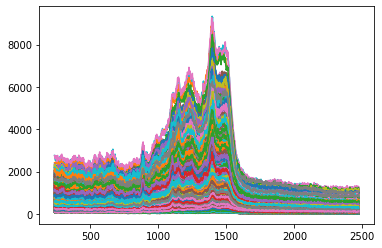

In [27]:
for i in range(len(car_collected_preprocessed)):
    plt.plot(f_sup[170:], car_collected_preprocessed[i, 170:])
plt.show()

### PCA on 1 analyte (Can choose any of the analytes)

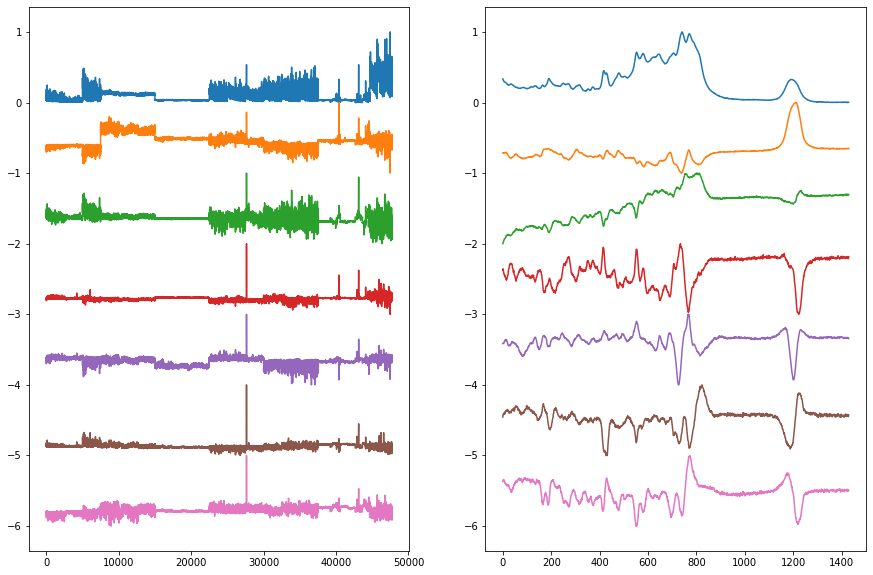

In [110]:
# car_collected_preprocessed = rpd.remove_zeros_or_nans(car_collected_preprocessed)
n_components= 7
model = PCA(n_components)
W_PCA = model.fit_transform(spectra_dataset[:, 170:])
H_PCA = model.components_
t_dataN_PCA = H_PCA
f_dataN_PCA = W_PCA
plt.figure("PCA analysis on Carbendazim", figsize=(15, 10))
plt.subplot(121)#, figsize = (15, 10))
for i in range(n_components):
    plt.plot((f_dataN_PCA[:,i]-min(f_dataN_PCA[:,i]))/np.mean(max(f_dataN_PCA[:,i])-min(f_dataN_PCA[:,i]))-i)
# plt.show()
plt.subplot(122)#, figsize=(15, 10))
for i in range(n_components):
    plt.plot(((t_dataN_PCA[i]-min(t_dataN_PCA[i]))/(max(t_dataN_PCA[i])-min(t_dataN_PCA[i]))-i))
# plt.show()
plt.savefig("car_pca.png", dpi=500)

In [78]:
pca_car_1 = ((t_dataN_PCA[0]-min(t_dataN_PCA[0]))/(max(t_dataN_PCA[0])-min(t_dataN_PCA[0])))
pca_car_2 = ((t_dataN_PCA[1]-min(t_dataN_PCA[1]))/(max(t_dataN_PCA[1])-min(t_dataN_PCA[1])))

In [80]:
pca_thia_1 = ((t_dataN_PCA[0]-min(t_dataN_PCA[0]))/(max(t_dataN_PCA[0])-min(t_dataN_PCA[0])))
pca_thia_2 = ((t_dataN_PCA[1]-min(t_dataN_PCA[1]))/(max(t_dataN_PCA[1])-min(t_dataN_PCA[1])))

In [75]:
pca_car_thia_1 = ((t_dataN_PCA[0]-min(t_dataN_PCA[0]))/(max(t_dataN_PCA[0])-min(t_dataN_PCA[0])))
pca_car_thia_2 = ((t_dataN_PCA[1]-min(t_dataN_PCA[1]))/(max(t_dataN_PCA[1])-min(t_dataN_PCA[1])))

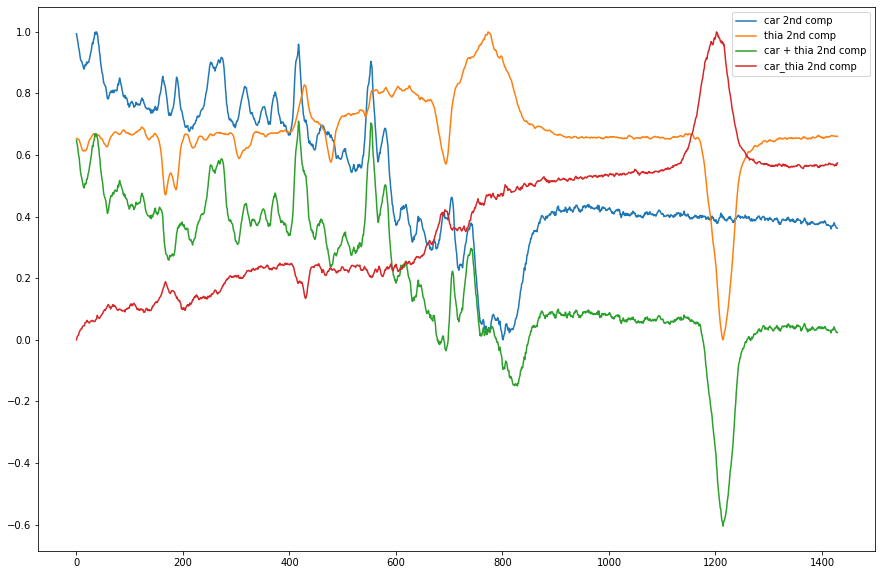

In [105]:
plt.figure(figsize=(15,10))
plt.plot(pca_car_2 + 1, label="car 2nd comp")
plt.plot(pca_thia_2 + 1, label="thia 2nd comp")
plt.plot((pca_car_2 + (pca_thia_2) + 1), label="car + thia 2nd comp")
plt.plot(pca_car_thia_2 + 1, label="car_thia 2nd comp")
# plt.plot(pca_car_thia_2)
# plt.plot(pca_car_1 - pca_car_2)
# plt.plot(pca_thia_1 - pca_thia_2)
# plt.plot(pca_car_thia_1 - pca_car_thia_2)
plt.legend()

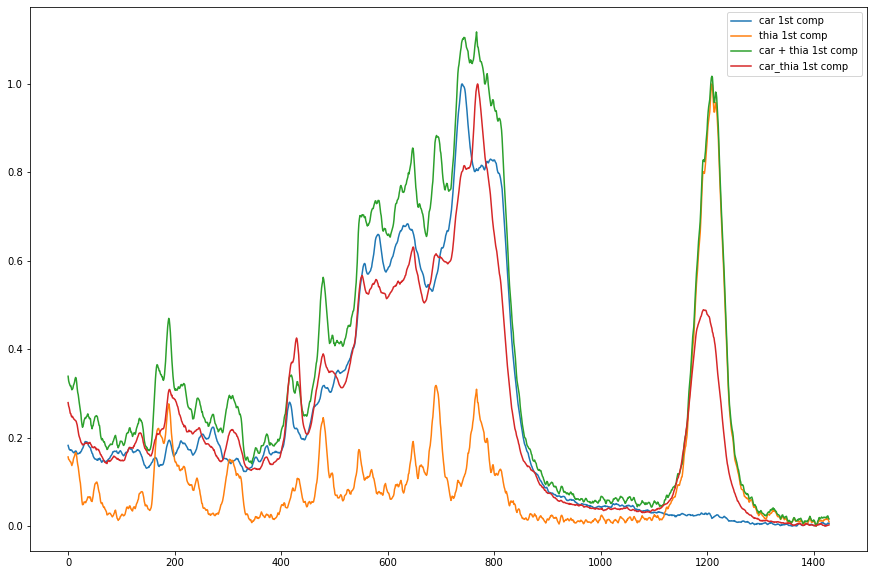

In [94]:
plt.figure(figsize=(15, 10))
plt.plot(pca_car_1, label="car 1st comp")
plt.plot(pca_thia_1, label="thia 1st comp")
plt.plot(pca_car_1 + pca_thia_1, label="car + thia 1st comp")
plt.plot(pca_car_thia_1, label="car_thia 1st comp")
# plt.plot(pca_car_thia_2)
# plt.plot(pca_car_1 - pca_car_2)
# plt.plot(pca_thia_1 - pca_thia_2)
# plt.plot(pca_car_thia_1 - pca_car_thia_2)
plt.legend()